In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [143]:
path='/Users/a2v/Desktop/DS/data/karpov.couses/data'

In [144]:
# функция находит файлы формата csv в домашней директории 
# склеивает их и возвращает полноценный DataFrame

def data_merge(path, extension=".csv"):
    # create df for all data
    df = pd.DataFrame()
    # read data from all filse and add it to general df
    for root, dirs_list, files_list in os.walk(path):
        for file_name in files_list:
            # compare the last item in the list
            if os.path.splitext(file_name)[-1] == extension:
                # construct full path to file
                file_name_path = os.path.join(root, file_name)
                # reading the csv file
                temp_df = pd.read_csv(file_name_path)
                # extract date and name
                path_parts = root.split('/')
                date = path_parts[-2]
                name = path_parts[-1]
                # add date and name columns
                temp_df['date'] = date
                temp_df['name'] = name
                #insert data into main df
                df = pd.concat((df, temp_df))
    return df

In [145]:
result = data_merge(path)

In [146]:
result.drop(columns=['Unnamed: 0'], inplace=True)
result.reset_index(drop=True, inplace=True)
result.date = pd.to_datetime(result.date)
result.head()

,product_id,quantity,date,name
0,56,4,2020-12-06,Vasiliy_Fedorov
1,97,3,2020-12-06,Vasiliy_Fedorov
2,79,3,2020-12-06,Vasiliy_Fedorov
3,29,5,2020-12-06,Vasiliy_Fedorov
4,73,5,2020-12-08,Alexey_Fedorov


Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [173]:
users = result.groupby('name') \
      .agg({'quantity':'sum'}) \
      .sort_values('quantity', ascending=False).head(10)

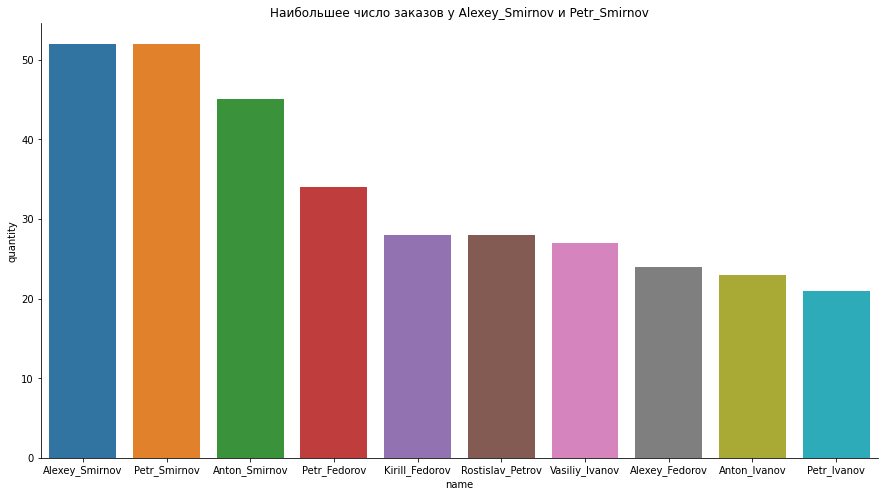

In [199]:
plt.figure(figsize=(15, 8))
sns.barplot(users.index, users.quantity)
plt.title(f'Наибольшее число заказов у {users.quantity.idxmax()} и {users.quantity[1:].idxmax()}')
sns.despine()
plt.show()

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [201]:
product = result.groupby('product_id') \
      .agg({'quantity':'sum'}) \
      .sort_values('quantity', ascending=False).head(10)

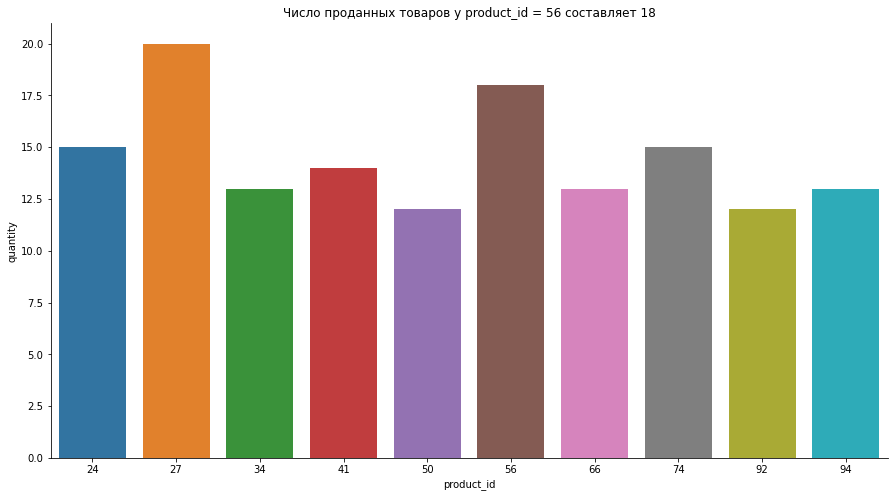

In [227]:
plt.figure(figsize=(15, 8))
sns.barplot(product.index, product.quantity)
plt.title(f'Число проданных товаров у product_id = 56 составляет {id_56}')
sns.despine()
plt.show()

In [225]:
id_56 = result[result['product_id']==56]['quantity'].sum()

Визуализируйте продажи по дням.

In [240]:
result['days'] = result.date.dt.day

In [242]:
sales_for_days = result.groupby('days') \
      .agg({'quantity':'sum'}) \
      .sort_values('days')

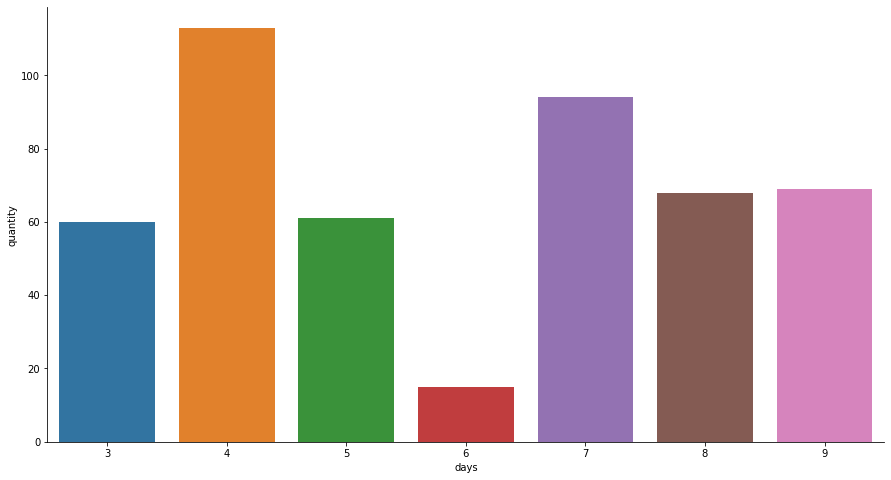

In [243]:
plt.figure(figsize=(15, 8))
sns.barplot(sales_for_days.index, sales_for_days.quantity)
sns.despine()
plt.show()

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [249]:
result.groupby(['name', 'product_id']) \
      .agg({'days':pd.Series.nunique}) \
      .query('days > 1')

,,days
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
